# ENGR 421 - Homework 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Data Generation

In [2]:
class_means = np.array([[+0.0, +2.5], 
                        [-2.5, -2.0], 
                        [+2.5, -2.0]])

class_covariances = np.array([[[+3.2, +0.0], 
                               [+0.0, +1.2]],
                              [[+1.2, -0.8], 
                               [-0.8, +1.2]],
                              [[+1.2, +0.8], 
                               [+0.8, +1.2]]])

class_sizes = np.array([120, 90, 90])

In [3]:
np.random.seed(1)
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
X = np.vstack((points1, points2, points3))

y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

## Plotting Data

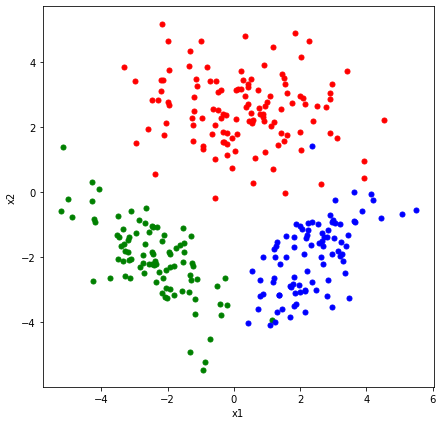

In [4]:
plt.figure(figsize = (7, 7))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 10)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 10)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 10)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Parameter Estimation

### Sample Means

In [5]:
K = np.max(y)
sample_means = [np.mean(X[y == (c + 1)], axis=0) for c in range(K)]

print("Sample Means:\n")
print(f"Class 1:\n{sample_means[0]}\n")
print(f"Class 2:\n{sample_means[1]}\n")
print(f"Class 3:\n{sample_means[2]}")

Sample Means:

Class 1:
[0.26563078 2.52716835]

Class 2:
[-2.40419817 -2.06445676]

Class 3:
[ 2.35008736 -1.98725172]


### Sample Covariances

In [6]:
a = X[y == 1] - sample_means[0]

sample_cov_mat = [np.dot((X[y == (c+1)] - sample_means[c]).T,X[y == (c+1)] - 
                         sample_means[c])/class_sizes[c] for c in range(K)]

print("Sample Covariances:\n")
print(f"Class 1:\n{sample_cov_mat[0]}\n")
print(f"Class 2:\n{sample_cov_mat[1]}\n")
print(f"Class 3:\n{sample_cov_mat[2]}")

Sample Covariances:

Class 1:
[[ 2.66148669 -0.23424653]
 [-0.23424653  1.16477455]]

Class 2:
[[ 1.40761298 -0.96375575]
 [-0.96375575  1.3258655 ]]

Class 3:
[[0.98615056 0.63474997]
 [0.63474997 1.20502163]]


### Class Priors

In [7]:
class_priors = [np.mean(y == (c + 1)) for c in range(K)]
class_priors

[0.4, 0.3, 0.3]

## Calculating Score Functions

In [8]:
D = 3
y_predicted = []
for i in range(X.shape[0]):
    scores = [-D/2*np.log(2*np.pi) -1/2*np.log(np.linalg.det(sample_cov_mat[c])) -1/2 * np.dot(np.dot(X[i] 
            - sample_means[c], np.linalg.inv(sample_cov_mat[c])), X[i] - sample_means[c].T) + np.log(class_priors[c]) for c in range(K)]
    y_predicted.append(np.argmax(scores)+1)
y_predicted = np.array(y_predicted)

print(y.shape)
print(y_predicted.shape)

(300,)
(300,)


## Confusion Matrix

In [9]:
confusion_matrix = pd.crosstab(y_predicted, y, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        118   0   1
2          0  89   0
3          2   1  89


In [10]:
x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)

discriminant_values = np.zeros((1201,1201, 3))
for i in range(1201):
    for j in range(1201):
        discriminant_values[i][j][:] = [-D/2*np.log(2*np.pi) -1/2*np.log(np.linalg.det(sample_cov_mat[c])) -1/2 * np.dot(np.dot(np.array([x1_interval[i], x2_interval[j]]).reshape(1,2) 
            - sample_means[c], np.linalg.inv(sample_cov_mat[c])), (np.array([x1_interval[i], x2_interval[j]]).reshape(1,2) 
            - sample_means[c]).T) + np.log(class_priors[c]) for c in range(K)]

A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]

In [11]:
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan

## Plotting Boundries

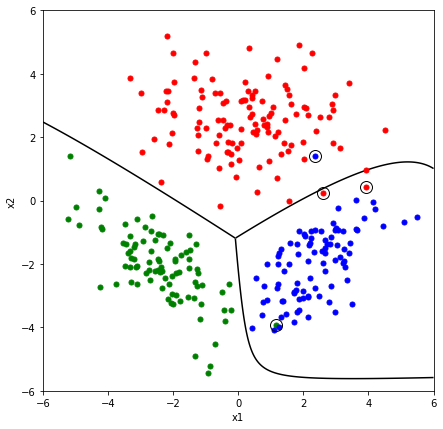

In [12]:
plt.figure(figsize = (7, 7))
plt.plot(X[y == 1, 0], X[y == 1, 1], "r.", markersize = 10)
plt.plot(X[y == 2, 0], X[y == 2, 1], "g.", markersize = 10)
plt.plot(X[y == 3, 0], X[y == 3, 1], "b.", markersize = 10)
plt.plot(X[y_predicted != y, 0], X[y_predicted != y, 1], "ko", markersize = 12, fillstyle = "none")

res = A + B + C
plt.contour(x1_grid, x2_grid, (A - B).T, levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, (A - C).T, levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, (B - C).T, levels = 0, colors = "k")

#plt.contourf(x1_grid, x2_grid, (A - B).T,levels = 0, colors="#ff000050")
#plt.contourf(x1_grid, x2_grid, C.T, colors="#0000ff50")
#plt.contourf(x1_grid, x2_grid, B.T, colors="#00ff0050")

#plt.contour(x1_grid, x2_grid, discriminant_values, levels = 0, colors = "k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()